# Récursivité

## Introduction

**Objectifs**:
- Comprendre que des problèmes complexes qui peuvent être difficiles à résoudre avec les «techniques habituelles» peuvent avoir une solution récursive simple,
- Apprendre à formuler des programmes récursivement,
- Comprendre et appliquer les trois lois de la récursivité,
- Comprendre la récursivité comme une forme d'itération,
- Implémenter une solution récursive à un problème,
- Comprendre comment la récursion fonctionne à bas niveau.

La récursivité est une *méthode de résolution de problème*. Elle consiste à **découper le problème, puis les sous-problèmes obtenus ... jusqu'à obtenir des sous-problèmes si petits qu'ils puissent être résolus de façon directe**. 

Ordinairement, la récursivité nécessite qu'une fonction s'appelle **elle-même**.

## Exemple 1 - somme d'une liste de nombres

Pour illustrer le propos, considérons le problème classique qui consiste à *calculer la somme d'une liste de nombres*. 

Voici sa solution «classique»:

In [ ]:
def sommer(nbs):
    somme = 0 # accu
    for nb in nbs:
        somme = somme + nb # ou somme += nb
    return somme

assert sommer([5, 4, 7]) == 16

La somme se produit alors comme suit: $$
(\underbrace{
    (\underbrace{
        (\underbrace{(0+5)}_{\text{it. 1}
         } +4)
    }_{\text{it. 2}}+7)
}_{\text{it. 3}})
$$

Mais supposez un instant que nous ne disposions ni de boucle `while`, ni de boucle `for`.

Comme mathématiquement: 

$$(((5) + 4)+7)=5+4+7=(5+(4+(7)))$$

nous pouvons utiliser la dernière expression pour découper simplement le problème en deux parties:

1. Récupérer le *premier* nombre de la liste: `5`,

2. calculer la somme des nombres *restants*: `sommer([4, 7])`,

3. ajouter les valeurs obtenues aux deux premières étapes: `5 + sommer([4, 7])`.

Les points 1. et 3. sont élémentaires et le **point 2.** est un problème **similaire** au problème initial **mais plus petit**.

On peut alors réappliquer **le même** découpage à ce sous-problème ... jusqu'à obtenir un sous-problème **si petit** qu'on puisse le *résoudre directement*: 
> si la liste à sommer ne contient qu'un nombre, sa somme est simplement ce nombre.

Pour notre exemple cela donne: 

```
sommer([5, 4, 7]) = 5 + sommer([4, 7])
                        sommer([4, 7]) = 4 + sommer([7])
                                             sommer([7]) = 7
                                       = 4 +     7
                  = 5 +       11
= 16
```

ou en «applatissant»:
```
sommer([5, 4, 7]) = 5 + sommer([4, 7])
                  = 5 + (4 + sommer([7]))
                  = 5 + (4 + (7))
                  = 5 + (4 + 7)
                  = 5 + 11
                  = 16
```

En généralisant, cela donne:

```           
sommer(nbs) = 
    nbs[0]                      si taille nbs vaut 1
    nbs[0] + sommer(nbs[1:])    sinon
```

ou en paraphrasant l'étape «récursive» (la deuxième):
> Pour sommer des nombres, ajouter le premier à la *somme* de ceux qui restent.

Python (comme la plupart des langages de programmation) autorise qu'une fonction *s'appelle elle-même*. Nous expliquerons plus tard comment cela est possible.

Voici donc une **solution récursive** au problème de la somme:

In [ ]:
def sommer(nbs):
    # cas où le problème est suffisemment petit
    if len(nbs) == 1:
        return nbs[0]
    
    # si le problème est trop gros
    else:
        # découpage
        premier, *reste = nbs
        # résolution du sous-pb en appelant **cette** fonction
        somme_reste = sommer(reste)
        # combinaison
        return premier + somme_reste

assert sommer([5, 4, 7]) == 16

En utilisant la **composition** et les **tranches** \[*slices*\], on peut exprimer cela de façon plus concise:

In [ ]:
def sommer(nbs):
    if len(nbs) == 1: return nbs[0] # cas de base
    return nbs[0] + sommer(nbs[1:]) # appel récursif

assert sommer([5, 4, 7]) == 16

voir dans [Python Tutor](http://pythontutor.com/visualize.html#code=def%20sommer%28nbs%29%3A%0A%20%20%20%20if%20len%28nbs%29%20%3D%3D%201%3A%20return%20nbs%5B0%5D%0A%20%20%20%20return%20nbs%5B0%5D%20%2B%20sommer%28nbs%5B1%3A%5D%29%0A%0Aprint%28sommer%28%5B5,%204,%207%5D%29%29&cumulative=false&curInstr=0&heapPrimitives=false&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

Encore plus court en utilisant l'opérateur ternaire `expr1 if cond else expr2`

In [ ]:
def sommer(nbs):
    return nbs[0] + sommer(nbs[1:]) if len(nbs) > 1 else nbs[0]

assert sommer([5, 4, 7]) == 16

Voici les **points clés** de ce code:

1. On commence par vérifier si on est dans le **cas de base**: celui d'un problème suffisemment simple pour être résolu directement. C'est notre garde fou...!

2. **Récursion**: Si on est pas dans le cas de base, notre fonction *s'appelle elle-même* - on appelle cela un **appel récursif** - avec un argument qui exprime un problème plus simple - `[4, 7]` - par rapport à l'argument initial - `[5, 4, 7]`.

### Illustrations

Les numéros entourés précisent l'ordre des événements:

<center>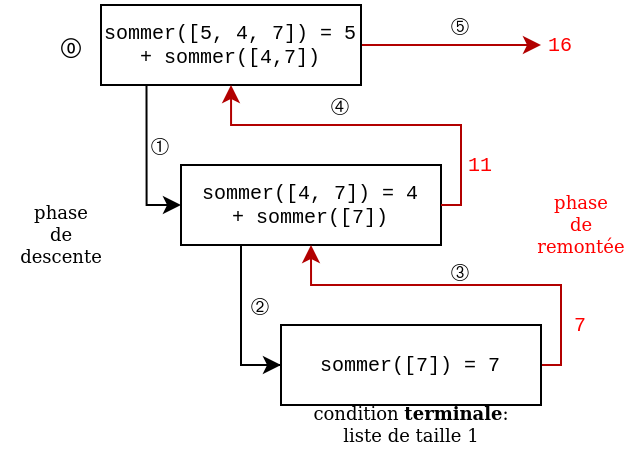</center>

En voici une autre en «poupées russes»:

<center>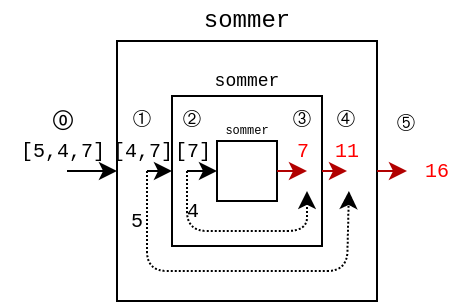</center>

### Visualiser les appels et retours

Pour visualiser cela depuis le code, on peut utiliser des `print`:

In [ ]:
def sommer_voir(nbs):
    print(f'appel de sommer({nbs})')
    
    if len(nbs) == 1: 
        print(f'retour de sommer({nbs}): -> {nbs[0]}')
        return nbs[0]
    
    reste = sommer_voir(nbs[1:])
    print(f'retour de sommer({nbs}): {nbs[0]} + {reste} -> {nbs[0] + reste}')
    return nbs[0] + reste

sommer_voir([5, 4, 7]) == 16

On peut même mieux voir l'imbrication des appels en décalant le texte affiché en fonction de l'ordre d'appel:

In [ ]:
def sommer_voir(nbs, n=0):
    dec = '  ' * n # niveau de décalage
    print(f'{dec}appel de sommer({nbs})')
    
    if len(nbs) == 1: 
        print(f'{dec}retour de sommer({nbs}): -> {nbs[0]}')
        return nbs[0]
    
    reste = sommer_voir(nbs[1:], n+1)
    print(f'{dec}retour de sommer({nbs}): {nbs[0]} + {reste} -> {nbs[0] + reste}')
    return nbs[0] + reste

sommer_voir([4, 7, 36, 12, 28])

Un **algorithme récursif** doit respecter les trois lois qui suivent:

1. Il doit posséder un (ou plusieurs) **cas de base(s)**: problème(s) si simple(s) qu'on peut le(s) résoudre directement,

2. Il doit modifier son état de façon à **progresser** vers l'un des cas de bases: **partage** du problème en sous-problèmes,

3. Il doit s'appeler lui-même, on dit **récursivement**.

Pour notre exemple:

1. **cas de base**: liste de taille 1, le résultat est son unique élément,

2. **partage**: la liste initiale est scindée en:
    - son *premier élément*,
    - les éléments *restants*: ils sont moins nombreux qu'initialement et on se rapproche donc du cas de base (*progression*).

3. **s'appelle lui-même**: on appelle récursivement la fonction sur les éléments *restants*.

### Exercices

#### Exercice 1

On définit la **factorielle d'un entier positif ou nul** $n$  comme le produit de tous les entiers de $1$ à $n$ (inclus). En mathématique, elle se note $n!$ (lire «factorielle $n$»).

Par exemple: $4!=1\times 2\times 3\times 4=24$.

On peut aussi définir la factorielle d'un entier de façon **récursive**: 

$$n!=\left\{\begin{array}{l}
1\text{ si } n\in\{0;1\}\cr
n\times (n-1)! \text{ sinon}
\end{array}\right.$$

Par exemple: $$\begin{eqnarray}
4!&=&4\times 3!\cr
&=& 4\times (3\times 2!)\cr
&=& 4\times (3\times (2\times 1!))\cr
&=& 4\times (3\times (2\times 1))\cr
&=& 24\end{eqnarray}$$

Définir une fonction *récursive* `fact` qui prend un entier positif en argument et renvoie sa factorielle.

In [ ]:
def fact(n):
    pass

**Solution**

In [ ]:
def fact(n):
    if n > 1: return n * fact(n - 1)
    return 1

fact(4)

***

#### Exercice 2

Définir de façon récursive `puissance(x, n)` qui calcule $x^n$ (comment passe-t-on de $x^{n-1}$ à $x^n$)

In [ ]:
def puissance(x, n):
    pass

**Solution**

In [ ]:
def puissance(x, n):
    if n > 0: return x * puissance(x, n-1)
    return 1 # x^0=1 quel que soit x

assert puissance(2, 10) == 1024

***

#### Exercice 3

Définir de façon récursive `maximum(nbs)` qui renvoie la plus grande valeur de la liste `nbs`.

In [ ]:
def maximum(nbs):
    pass

**Solution**

In [ ]:
def maximum(nbs):
    if len(nbs) == 1: return nbs[0]
    prem, *reste = nbs
    m = maximum(reste)
    return m if m > prem else prem

assert maximum([2, 5, -1, 12, 3]) == 12

***

#### Exercice 4

1. Définir de façon récursive `base2(n)` qui renvoie l'écriture en base 2 de l'entier positif $n$ (sous la forme d'une chaîne de caractères).

In [ ]:
def base2(n):
    pass

**Solution**

In [ ]:
def base2(n):
    if n in [0, 1]: return str(n)
    q, r = n // 2, n % 2
    return base2(q) + str(r)

assert base2(13) == '1101' # 1huit+1quatre+0deux+1un

2. De même, définir récursivement `base16(n)`

In [ ]:
def base16(n):
    pass

**Solution**

In [ ]:
def base16(n):
    if n in list(range(10)): return str(n)
    d = {10: "A", 11: "B", 12: "C", 13: "D", 14: "E", 15: "F"}
    if n in d: return d[n]
    q, r = n // 16, n % 16
    return base16(q) + base16(r)

assert base16(43) == '2B' # 2 seize + B un

***

#### Exercice 5

En tenant compte de l'observation suivante:
> si $q$ et $r$ sont respectivement le quotient et le reste de la division euclidienne de $n$ par $2$, alors $n=2q+r$ et: 
>
>$$x^n=x^{2q+r}=x^{2q}x^r=(x^{q})^{2}x^r$$

redéfinir de façon récursive la fonction `puissance(x, n)` de l'exercice 2.

In [ ]:
def puissance_bis(x, n):
    pass

assert puissance_bis(2, 10) == 1024
assert puissance_bis(5, 3) == 125

**Solution**

In [ ]:
def puissance_bis(x, n):
    if n == 0: return 1
    q, r = n // 2, n % 2
    tmp = puissance_bis(x, q)
    return tmp * tmp * (1 if r == 0 else x)

assert puissance_bis(2, 10) == 1024
assert puissance_bis(5, 3) == 125

Exécuter alors les cellules qui suivent:

*Note*: `%timeit` est une directive spéciale des notebooks qui permet de mesurer le temps moyen mis par une fonction pour s'exécuter.

In [ ]:
%timeit puissance_bis(2, 1024)

In [ ]:
%timeit puissance(2, 1024)

In [ ]:
%timeit 23 ** 50

Comment expliquer les différences observées?

***

## Exemple 2: Recherche d'un élément dans une liste

*Problème*: Trouver si un nombre appartient ou non à une liste. 

On renvoie `True` si c'est le cas `False` autrement.

**Cas de base**: la liste ne contient qu'un nombre, il suffit alors de le comparer avec celui qu'on cherche.

**Partage**: la liste initiale $L$ est découpée en deux listes $L_g$ et $L_d$ de tailles égales ou presque. Si $n$ est le nombre d'éléments de la liste et $m$ est le résultat de la division entière de $n$ par $2$:
- $L_g=T[1\dots m]$ (en python cela donne `Lg = L[:m]`)
- $L_d=T[(m+1)\dots n]$ (en python `Ld = L[m:]`)

**Récursion**: On appelle récursivement la fonction sur $T_g$ puis sur $T_d$; si l'un de ces appels récursifs renvoie `True`, on renvoie `True`; sinon on renvoie `False`. 

In [ ]:
def recherche(nb, nbs):
    # cas de base
    if len(nbs) == 1: 
        return nb == nbs[0]
    
    # découpage
    m = len(nbs)//2
    nbs_g, nbs_d = nbs[:m], nbs[m:]
    # résolution récursive
    a_gauche = recherche(nb, nbs_g)
    a_droite = recherche(nb, nbs_d)
    # combinaison
    res = a_gauche or a_droite
    return res

recherche(23, [0, 5, 15, 20, 25])

ou de façon plus concise:

In [ ]:
def recherche(nb, nbs):
    if len(nbs) == 1: return nb == nbs[0] # cas de base
    m = len(nbs)//2 # découpage
    return recherche(nb, nbs[:m]) or recherche(nb, nbs[m:])
  
recherche(5, [3, 1, 7, 5, 10])

Voir dans [Python Tutor](http://pythontutor.com/visualize.html#code=def%20recherche%28nb,%20nbs%29%3A%0A%20%20%20%20if%20len%28nbs%29%20%3D%3D%201%3A%20return%20nb%20%3D%3D%20nbs%5B0%5D%0A%20%20%20%20m%20%3D%20len%28nbs%29%20//%202%0A%20%20%20%20return%20recherche%28nb,%20nbs%5B%3Am%5D%29%20or%20recherche%28nb,%20nbs%5Bm%3A%5D%29%0A%20%20%0Arecherche%285,%20%5B3,%201,%207,%205,%2010%5D%29&cumulative=false&curInstr=0&heapPrimitives=false&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false)

### Illustration: arbre des appels

On peut tracer un arbre qui précise les différents **appels** (flèches noires) et **retours** (flèches rouges); les petits numéros indiquent l'ordre de ces événements:

<center>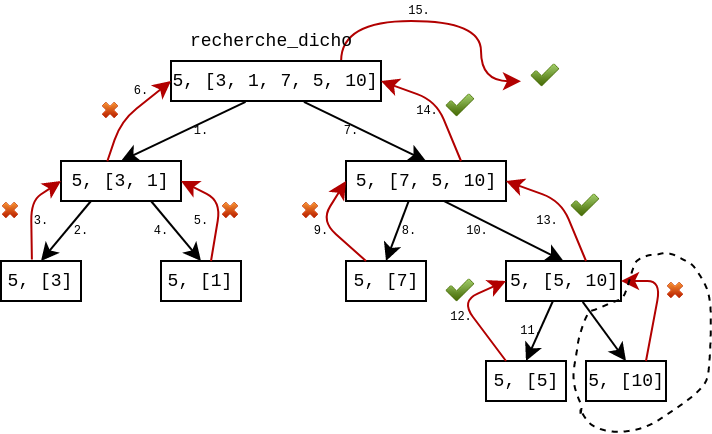</center>

### Note: opérateurs «court-circuits» `and` et `or`

L'appel entouré en pointillé n'a en fait pas lieu. Cela vient du comportement «court-circuit» ou «fainéant» des opérateurs logiques `and` et `or`. 

En effet, **dans** `recherche(5, [5, 10])`, lors de l'évaluation de:
    
    recherche(5, [5]) or recherche(5, [10])
                 
                 «de la forme»
                
                expr1 or expr2

si `expr1` vaut `True`, l'expression `expr1 or expr2` vaudra `True` ***quel que soit*** la valeur de `expr2`. Pour cette raison `expr2` n'est *pas évaluée dans ce cas* (comportement «fainéant»).

Comme ici, `recherche(5, [5])` vaut évidemment `True`,  `recherche(5, [10])` n'est **pas évaluée**. Vérifier par vous-même:

In [ ]:
def test():
    print("--> appel de test")
    return True

False or test() # exécuter puis remplacer `False` par `True`

De même, dans `expr1 and expr2`, si `expr1` vaut `False`, alors `expr2` n'est pas évaluée et le résultat est `False`.

### Visualiser les appels et retours

In [ ]:
def rech_dicho_voir(nb, nbs, n=0):
    dec = "  " * n
    print(f"{dec}appel rech_dicho({nb}, {nbs})")
    # cas de base
    if len(nbs) == 1:
        print(f"{dec}retour rech_dicho({nb}, {nbs}): -> {nb == nbs[0]}")
        return nb == nbs[0]
    
    # découpage
    m = len(nbs)//2
    g = rech_dicho_voir(nb, nbs[:m], n+1)
    res = g or rech_dicho_voir(nb, nbs[m:], n+1)
    print(f"{dec}retour rech_dicho({nb}, {nbs}): -> {res}")
    return res

rech_dicho_voir(5, [3, 1, 7, 5, 10])